In [2]:
import pandas as pd # Import necessary libraries for analysis
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [3]:
#import data and join in 1 table
path = "C:/Users/Ayoub baidane/projectpython_5"  
dfs = []
for file in os.listdir(path):
    if file.endswith(".csv"):   
        file_path = os.path.join(path, file)   
        df_temp = pd.read_csv(file_path)
        team_name = os.path.splitext(file)[0]  
        df_temp['Team'] = team_name
        dfs.append(df_temp)
final_df = pd.concat(dfs, ignore_index=True)
final_df.head()


,Date,Opponent,Is_Home,Result,Goals,Opponent_Goals,Possession,Shots,Shots_On_Target,Passes_Completed,...,Opponent_Crosses,Opponent_Fouls,Opponent_Offsides,Shot_Efficiency,Season,Month,Day_of_Week,Last5_Avg_Goals,Last5_Win_Rate,Team
0,2013-08-04 18:20:00,Galatasaray,1,-1,1,2,55,12,5,425,...,3,15,2,0.416667,2013,8,7,1.000000,0.00,Arsenal
1,2013-08-17 17:00:00,Aston Villa,1,-1,1,3,64,15,4,457,...,2,19,1,0.266667,2013,8,6,1.000000,0.00,Arsenal
2,2013-08-21 21:45:00,Fenerbahçe,0,1,3,0,60,13,7,451,...,2,15,1,0.538462,2013,8,3,1.666667,0.33,Arsenal
3,2013-08-24 14:45:00,Fulham,0,1,3,1,54,19,9,496,...,1,10,3,0.473684,2013,8,6,2.000000,0.50,Arsenal
4,2013-08-27 21:45:00,Fenerbahçe,1,1,2,0,65,14,6,460,...,4,16,1,0.428571,2013,8,2,2.000000,0.60,Arsenal


In [4]:
final_df.info() #check data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4194 entries, 0 to 4193
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       4194 non-null   object 
 1   Opponent                   4194 non-null   object 
 2   Is_Home                    4194 non-null   int64  
 3   Result                     4194 non-null   int64  
 4   Goals                      4194 non-null   int64  
 5   Opponent_Goals             4194 non-null   int64  
 6   Possession                 4194 non-null   int64  
 7   Shots                      4194 non-null   int64  
 8   Shots_On_Target            4194 non-null   int64  
 9   Passes_Completed           4194 non-null   int64  
 10  Pass_Accuracy              4194 non-null   int64  
 11  Corners                    4194 non-null   int64  
 12  Crosses                    4194 non-null   int64  
 13  Fouls                      4194 non-null   int64

In [5]:
final_df.isnull().sum()

Date                         0
Opponent                     0
Is_Home                      0
Result                       0
Goals                        0
Opponent_Goals               0
Possession                   0
Shots                        0
Shots_On_Target              0
Passes_Completed             0
Pass_Accuracy                0
Corners                      0
Crosses                      0
Fouls                        0
Offsides                     0
Opponent_Possession          0
Opponent_Shots               0
Opponent_Shots_On_Target     0
Opponent_Passes_Completed    0
Opponent_Pass_Accuracy       0
Opponent_Corners             0
Opponent_Crosses             0
Opponent_Fouls               0
Opponent_Offsides            0
Shot_Efficiency              1
Season                       0
Month                        0
Day_of_Week                  0
Last5_Avg_Goals              0
Last5_Win_Rate               0
Team                         0
dtype: int64

In [6]:
final_df["Shot_Efficiency"].fillna(final_df["Shot_Efficiency"].mean(), inplace=True) #replace the nulls with average and apply changes in dataframe

C:\Users\Ayoub baidane\AppData\Local\Temp\ipykernel_39484\3603310072.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  final_df["Shot_Efficiency"].fillna(final_df["Shot_Efficiency"].mean(), inplace=True) #replace the nulls with average and apply changes in dataframe


In [7]:
print(final_df["Shot_Efficiency"].isnull().sum()) #check

0


In [8]:
final_df.describe() #basic descriptive statistics

,Is_Home,Result,Goals,Opponent_Goals,Possession,Shots,Shots_On_Target,Passes_Completed,Pass_Accuracy,Corners,...,Opponent_Corners,Opponent_Crosses,Opponent_Fouls,Opponent_Offsides,Shot_Efficiency,Season,Month,Day_of_Week,Last5_Avg_Goals,Last5_Win_Rate
count,4194.000000,4194.000000,4194.000000,4194.000000,4194.000000,4194.000000,4194.000000,4194.000000,4194.000000,4194.000000,...,4194.000000,4194.000000,4194.000000,4194.000000,4194.000000,4194.000000,4194.000000,4194.000000,4194.000000,4194.000000
mean,0.503338,0.350024,1.956843,1.074869,58.024559,15.130186,5.609442,477.819504,84.323081,5.976633,...,4.131140,3.388412,10.806629,2.074869,0.378979,2019.006438,6.620649,4.924654,1.957721,0.577790
std,0.500048,0.825622,1.486660,1.104863,10.903611,6.045793,2.833998,124.048142,5.026693,3.168144,...,2.631057,2.367312,3.736177,1.669760,0.147952,3.373160,3.816987,1.937504,0.734776,0.232021
min,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,94.000000,49.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,2011.000000,1.000000,1.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,0.000000,51.000000,11.000000,4.000000,393.000000,81.000000,4.000000,...,2.000000,2.000000,8.000000,1.000000,0.277778,2016.000000,3.000000,3.000000,1.400000,0.400000
50%,1.000000,1.000000,2.000000,1.000000,59.000000,15.000000,5.000000,473.000000,85.000000,6.000000,...,4.000000,3.000000,11.000000,2.000000,0.370370,2019.000000,7.000000,6.000000,2.000000,0.600000
75%,1.000000,1.000000,3.000000,2.000000,66.000000,19.000000,7.000000,558.000000,88.000000,8.000000,...,6.000000,5.000000,13.000000,3.000000,0.470588,2022.000000,10.000000,7.000000,2.400000,0.800000
max,1.000000,1.000000,9.000000,7.000000,84.000000,58.000000,20.000000,979.000000,96.000000,20.000000,...,17.000000,16.000000,27.000000,11.000000,1.000000,2025.000000,12.000000,7.000000,6.000000,1.000000


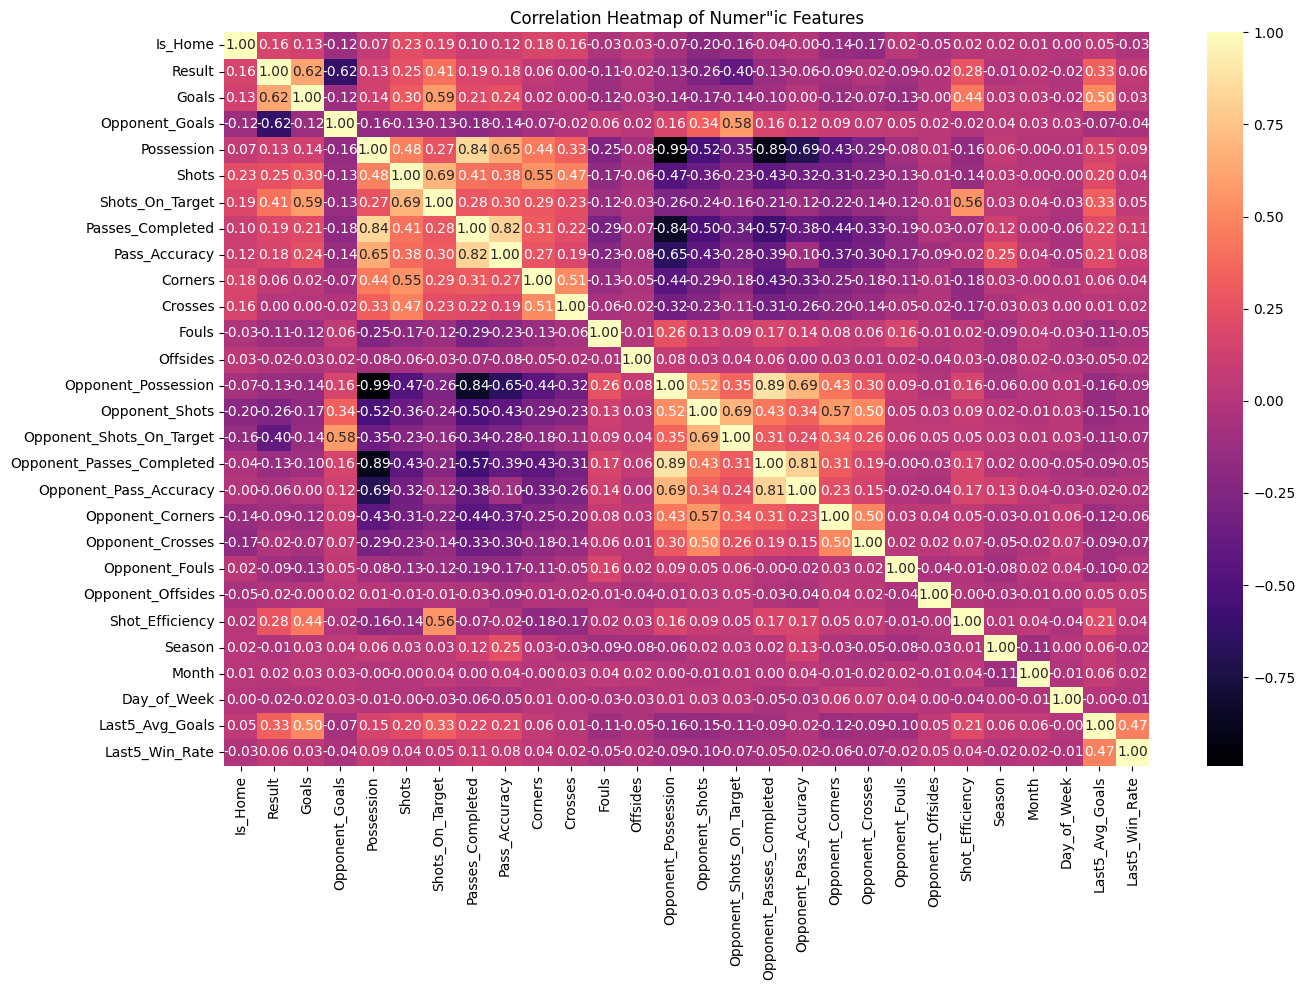

In [9]:
#exploration data en general
numirical_data=final_df.select_dtypes(include=[np.number])
corr_data=numirical_data.corr()
plt.figure(figsize=(14,10))
sns.heatmap(corr_data, annot=True, cmap="magma", fmt='.2f')
plt.title('Correlation Heatmap of Numer"ic Features')
plt.tight_layout()
plt.show()


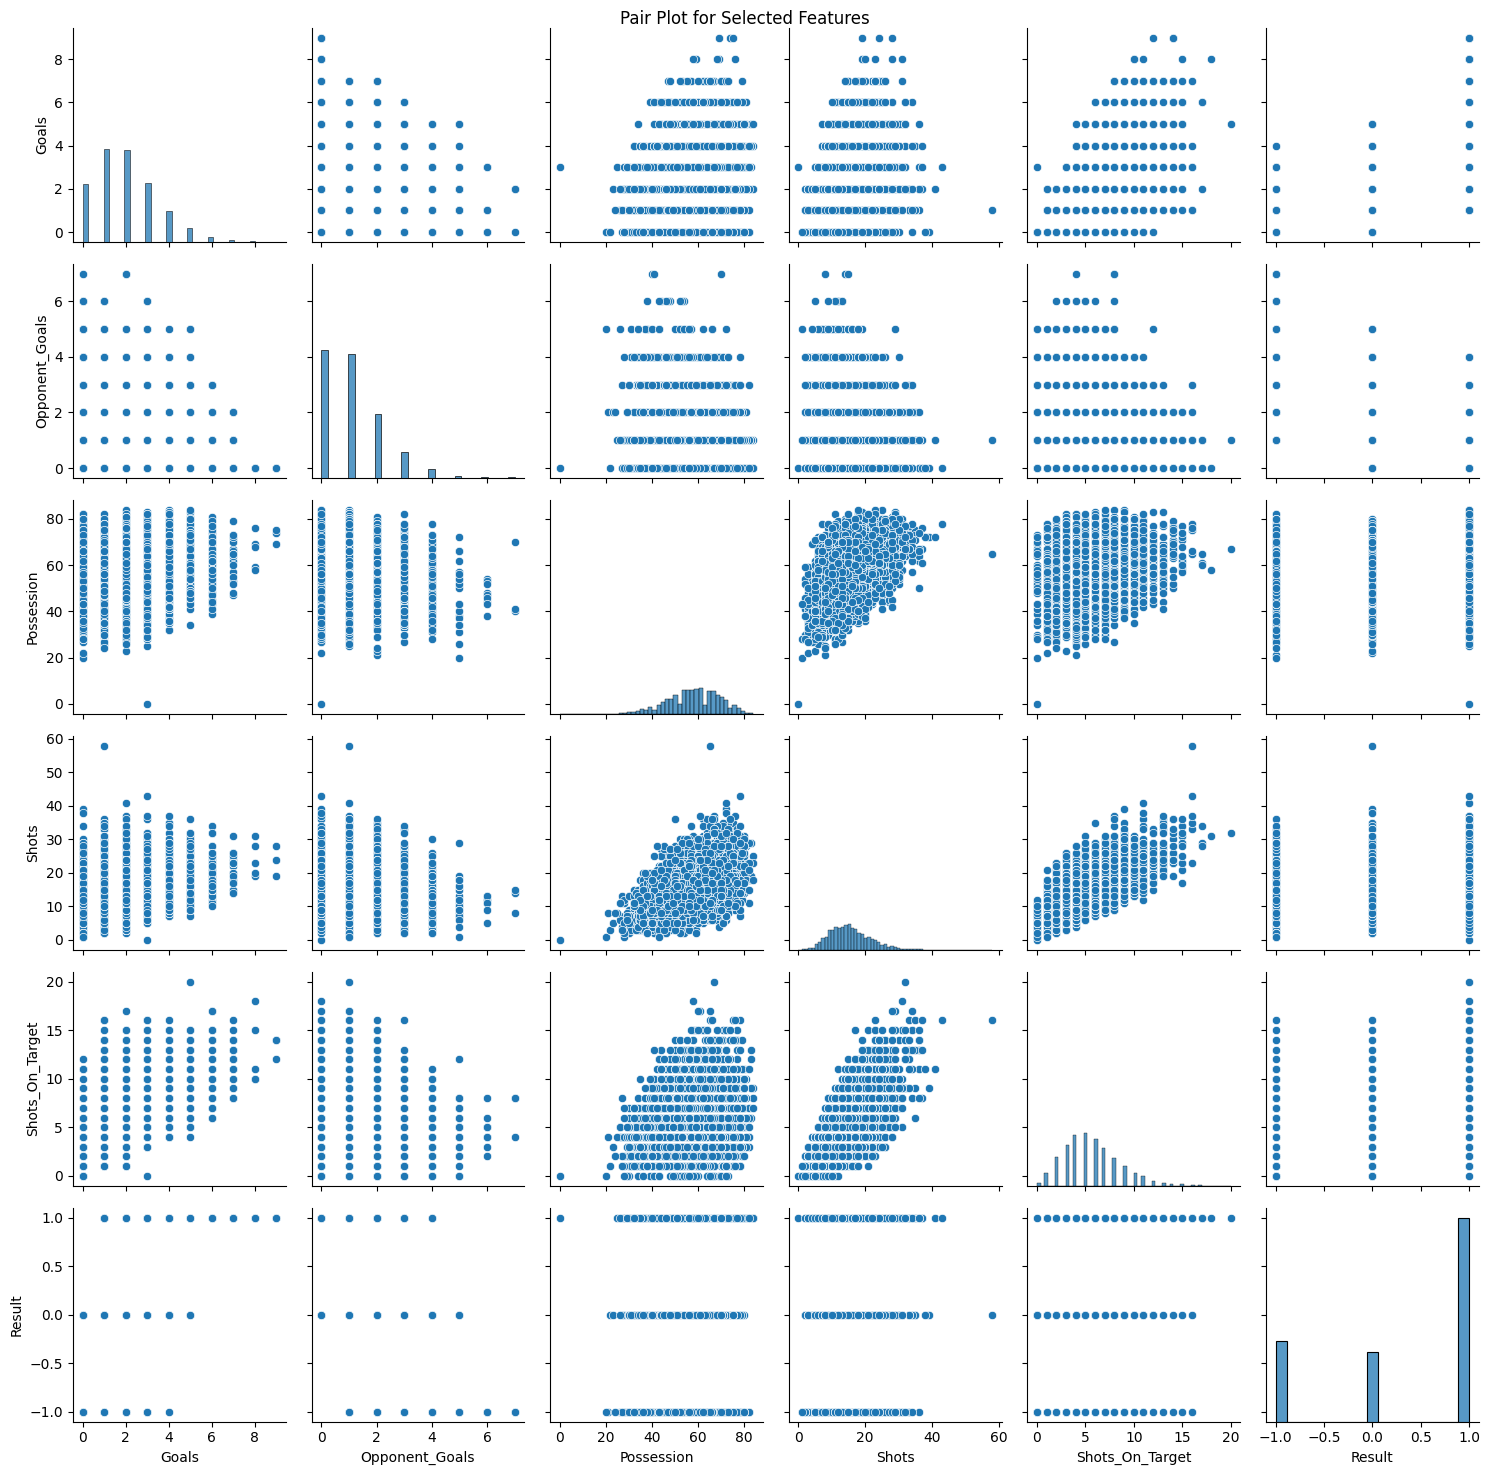

In [10]:
cols = ['Goals', 'Opponent_Goals', 'Possession', 'Shots', 'Shots_On_Target',"Result"]
sns.pairplot(final_df[cols])
plt.suptitle('Pair Plot for Selected Features')
plt.tight_layout()
plt.show()

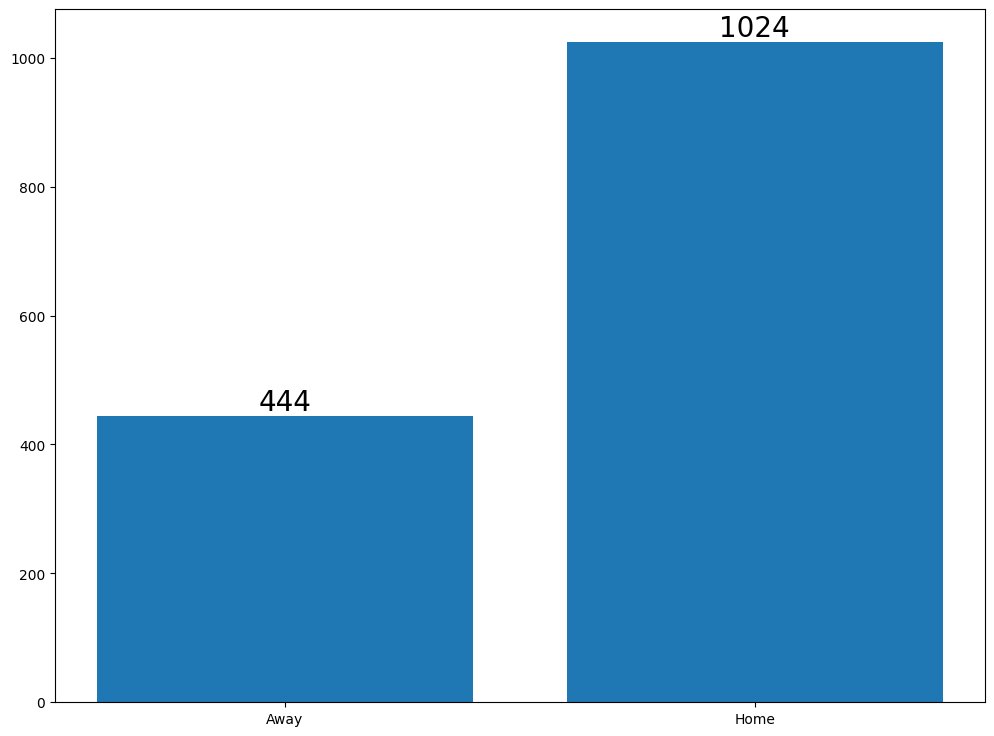

In [11]:
R_H=final_df.groupby("Is_Home")["Result"].sum().reset_index()
R_H["Is_Home"]=R_H["Is_Home"].replace({0: "Away", 1: "Home"})
plt.figure(figsize=(12,9))
bars=plt.bar(R_H["Is_Home"],R_H['Result'])
for bar in bars:
    plt.text(bar.get_x()+ bar.get_width()/2,  
        bar.get_height() + 0.5,                    
        f'{bar.get_height()}',                      
        ha='center', va='bottom',fontsize=20         
    )

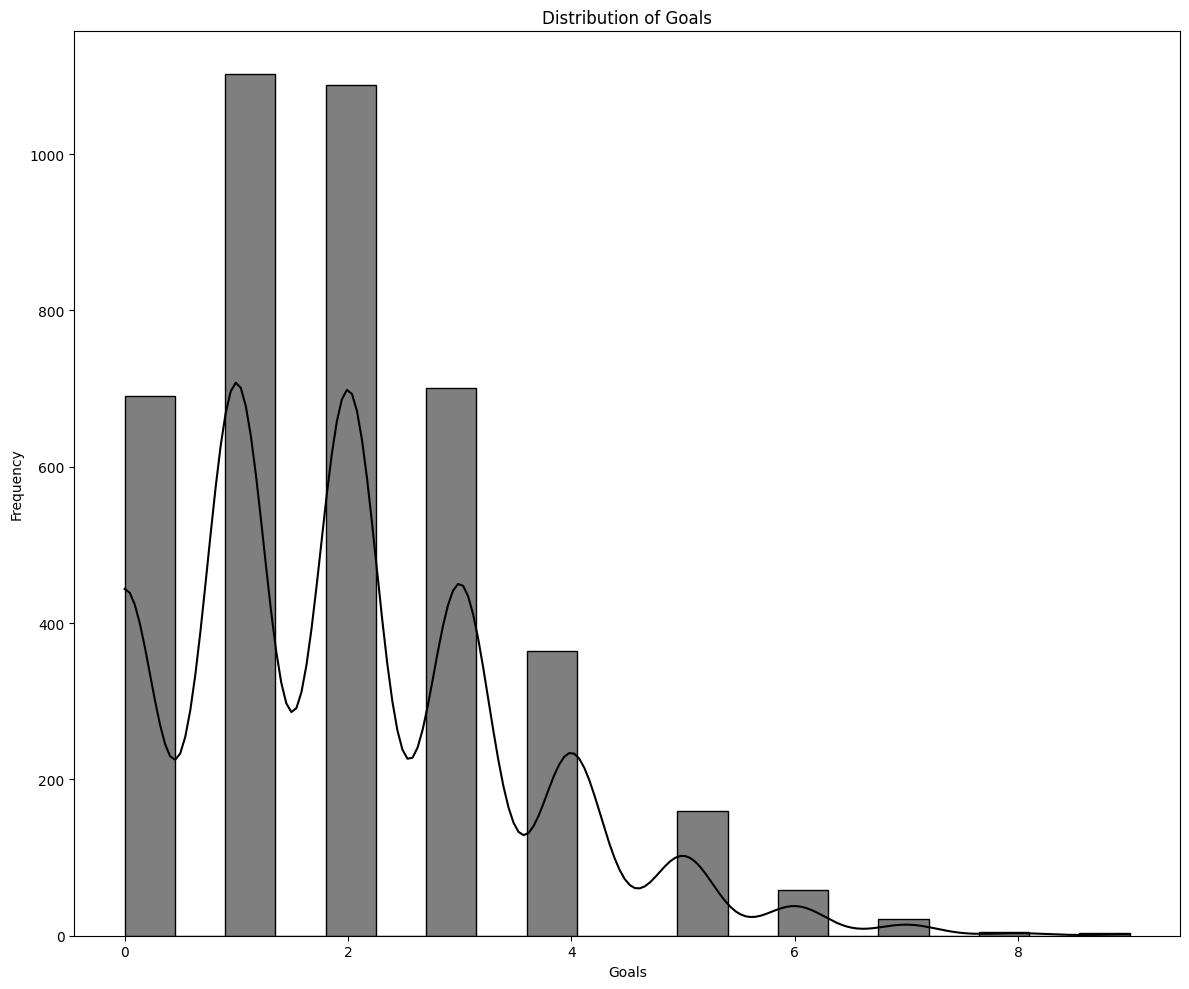

In [12]:
plt.figure(figsize=(12,10))
sns.histplot(final_df['Goals'], kde=True, color='black', bins=20)
plt.title('Distribution of Goals')
plt.xlabel('Goals')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

C:\Users\Ayoub baidane\AppData\Local\Temp\ipykernel_39484\609604810.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, palette='magma')


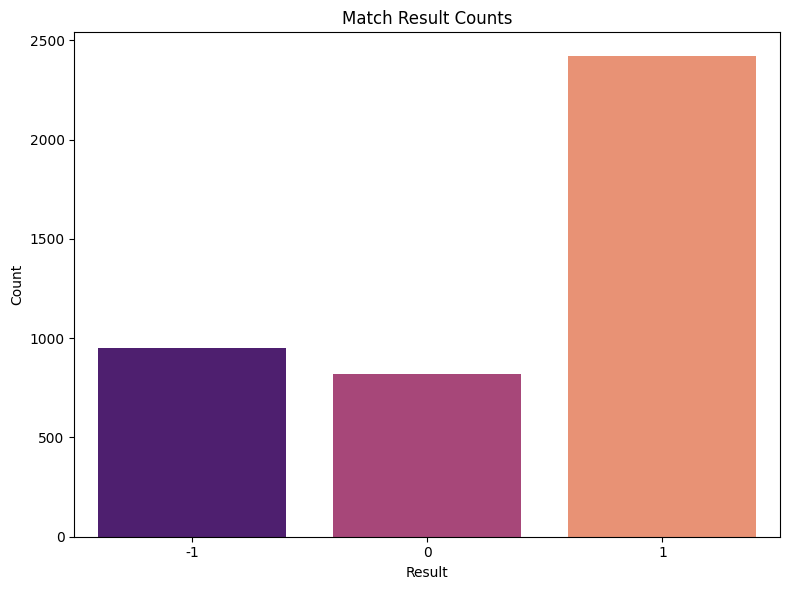

Result
-1     952
 0     822
 1    2420
Name: Team, dtype: int64

In [13]:
df=final_df.groupby('Result')["Team"].count()
plt.figure(figsize=(8,6))
sns.barplot(data=df, palette='magma')
plt.title('Match Result Counts')
plt.xlabel('Result')
plt.ylabel('Count')
plt.tight_layout()
plt.show()
df

In [20]:
df=final_df[final_df["Season"] >= 2013].groupby(["Season","Team"])[["Fouls","Opponent_Fouls"]].sum().reset_index()

for i in range(2013, 2026):
    temp_f = df[df["Season"] == i]["Fouls"].max()  
    temp_fo = df[df["Season"] == i]["Opponent_Fouls"].max()  
    temp_team = df[(df["Season"] == i) & (df["Fouls"] == temp_f)]["Team"].iloc[0]
    temp_o_team = df[(df["Season"] == i) & (df["Opponent_Fouls"] == temp_fo)]["Team"].iloc[0]
    print(f"The team who has the most fouls in {i} is {temp_team} with {temp_f} fouls",end= " |||| ")
    print(f"The team who has the most opponent fouls in {i} is {temp_o_team} with {temp_fo} opponent fouls")
    print("-"*150)
      
df

The team who has the most fouls in 2013 is Tottenham with 468 fouls |||| The team who has the most opponent fouls in 2013 is Tottenham with 478 opponent fouls
------------------------------------------------------------------------------------------------------------------------------------------------------
The team who has the most fouls in 2014 is Chelsea with 707 fouls |||| The team who has the most opponent fouls in 2014 is Chelsea with 792 opponent fouls
------------------------------------------------------------------------------------------------------------------------------------------------------
The team who has the most fouls in 2015 is Liverpool with 691 fouls |||| The team who has the most opponent fouls in 2015 is Chelsea with 779 opponent fouls
------------------------------------------------------------------------------------------------------------------------------------------------------
The team who has the most fouls in 2016 is Manchester United with 784 fouls 

,Season,Team,Fouls,Opponent_Fouls
0,2013,Arsenal,348,364
1,2013,Chelsea,201,186
2,2013,Liverpool,116,117
3,2013,Manchester City,173,133
4,2013,Manchester United,143,160
...,...,...,...,...
73,2025,Chelsea,153,162
74,2025,Liverpool,217,190
75,2025,Manchester City,142,167
76,2025,Manchester United,204,210


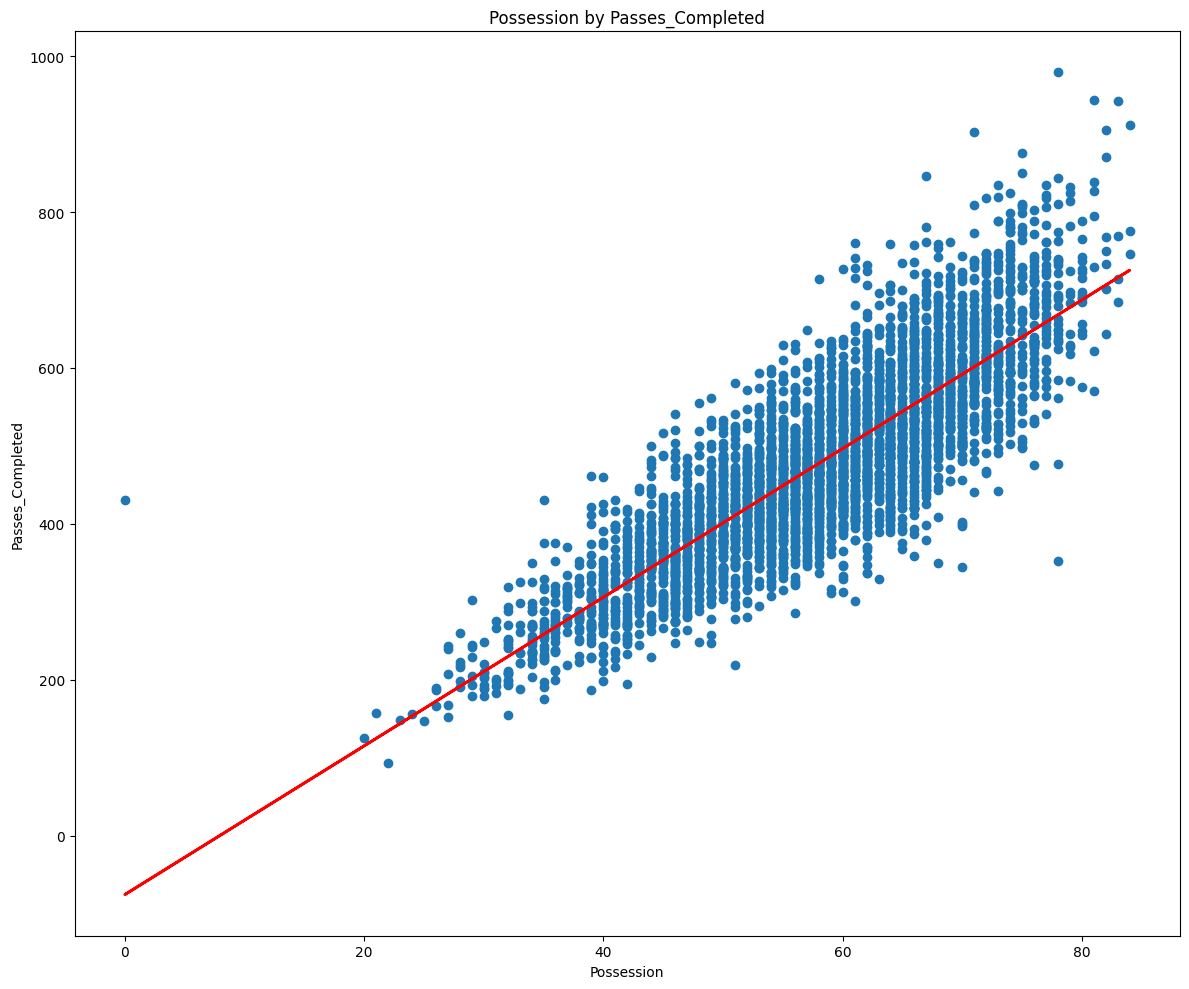

In [15]:
x=final_df["Possession"]
y=final_df["Passes_Completed"]
plt.figure(figsize=(12,10))
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b, color='red', linewidth=2, label='Trendline')
plt.scatter(x,y)
plt.title("Possession by Passes_Completed")
plt.xlabel("Possession")
plt.ylabel("Passes_Completed")
plt.tight_layout()
plt.show()

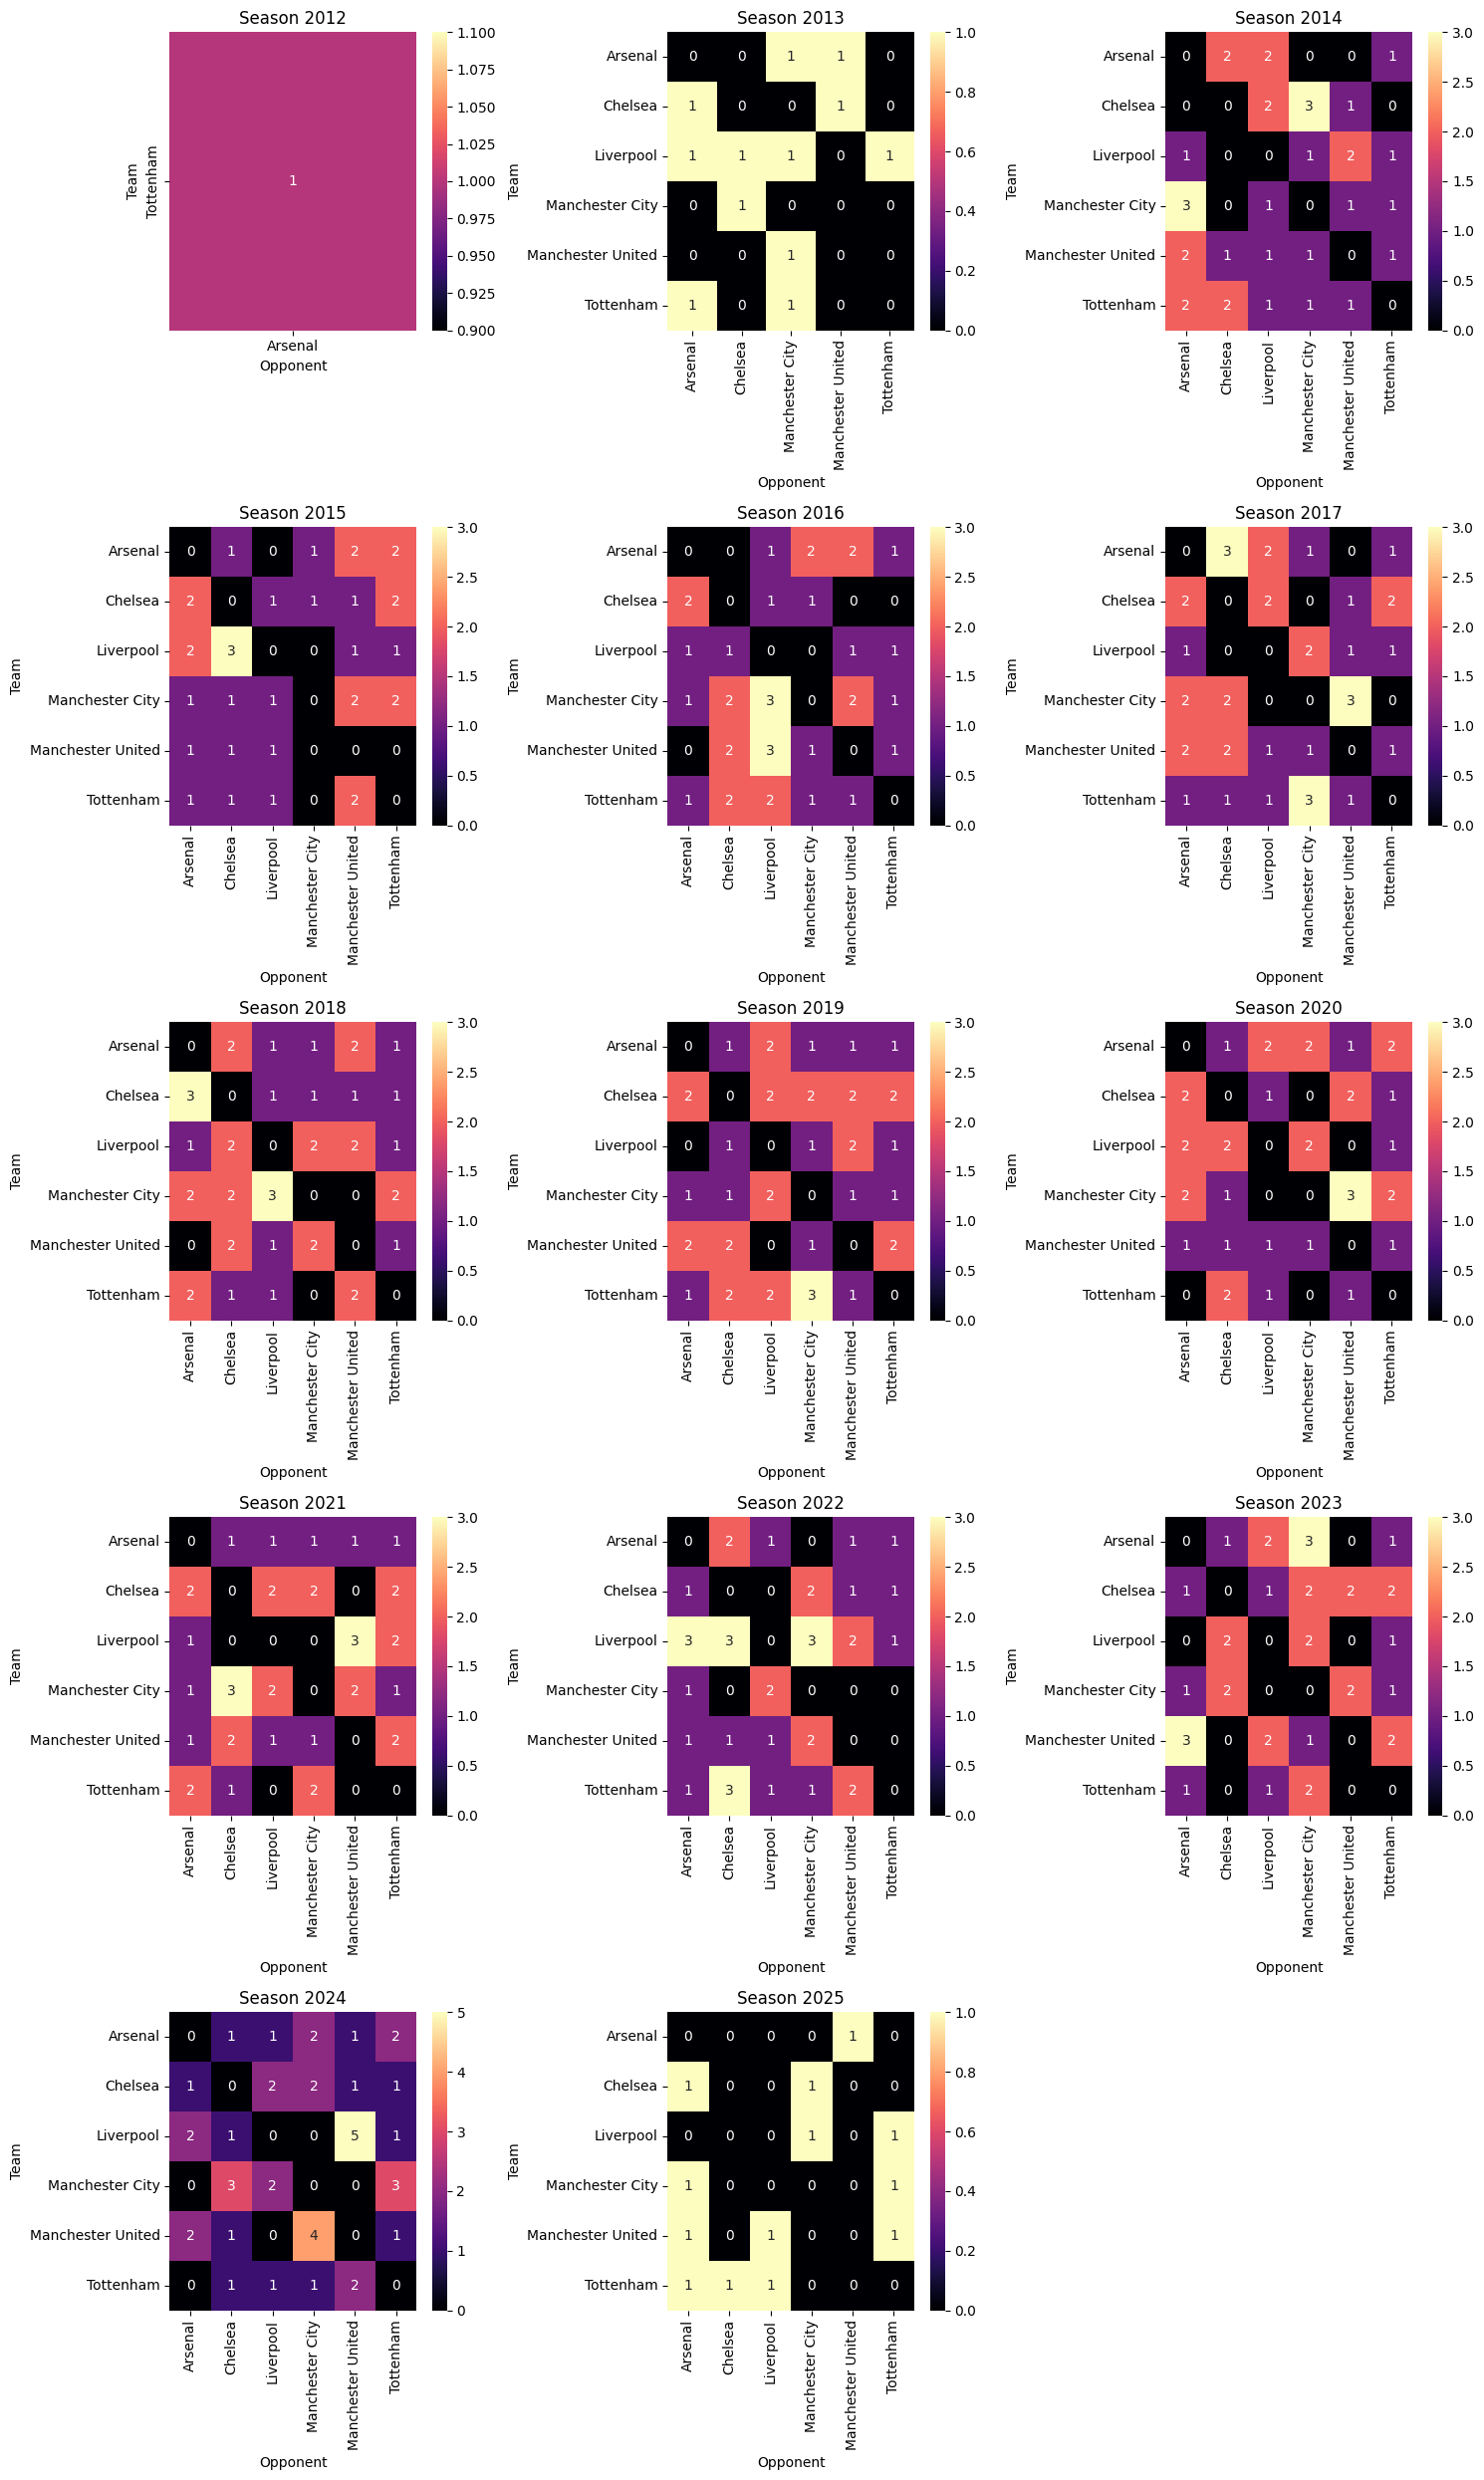

In [16]:
#Top 6 vs each other analysis
teams = ["Manchester City","Manchester United","Arsenal","Liverpool","Chelsea","Tottenham"]

df_filtered = final_df[
    final_df["Team"].isin(teams) & final_df["Opponent"].isin(teams)
]
seasons = sorted(df_filtered["Season"].unique())
n_seasons = len(seasons)

n_cols = 3
n_rows = (n_seasons + n_cols - 1) // n_cols  
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols*5, n_rows*5))
axes = axes.flatten()

for i, season in enumerate(seasons):
    df_season = df_filtered[df_filtered["Season"] == season]
    matches = df_season.groupby(["Team", "Opponent"]).size().reset_index(name="Matches")
    matrix = matches.pivot(index="Team", columns="Opponent", values="Matches").fillna(0)
    sns.heatmap(matrix, annot=True, fmt=".0f", cmap="magma", ax=axes[i])
    axes[i].set_title(f"Season {season}")

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [17]:
new_df=df_filtered[["Team","Opponent","Goals","Opponent_Goals","Result","Possession","Opponent_Possession",]].value_counts().reset_index()
new_df = new_df.rename(columns={"Result": "Result Team"})
new_df

,Team,Opponent,Goals,Opponent_Goals,Result Team,Possession,Opponent_Possession,count
0,Chelsea,Manchester United,1,1,0,48,52,2
1,Manchester City,Manchester United,0,2,-1,50,50,2
2,Chelsea,Liverpool,1,1,0,45,55,2
3,Liverpool,Manchester United,3,0,1,53,47,2
4,Liverpool,Manchester City,1,1,0,40,60,2
...,...,...,...,...,...,...,...,...
441,Arsenal,Manchester United,2,3,-1,61,39,1
442,Arsenal,Tottenham,0,1,-1,48,52,1
443,Arsenal,Tottenham,0,1,-1,50,50,1
444,Arsenal,Tottenham,0,2,-1,49,51,1


In [23]:
df_copy = new_df.copy()
df_copy["Teams_sorted"] = df_copy.apply(
    lambda row: tuple(sorted([row["Team"], row["Opponent"]])), axis=1
)
matches_combined = df_copy.groupby("Teams_sorted")["count"].sum().reset_index()
matches_combined[["Team1", "Team2"]] = pd.DataFrame(matches_combined["Teams_sorted"].tolist(), index=matches_combined.index)
matches_combined = matches_combined.drop(columns=["Teams_sorted"])
matches_combined.rename(columns={"count":"Number of matches"},inplace=True)
matches_combined.sort_values("Number of matches").reset_index()

,index,Number of matches,Team1,Team2
0,14,26,Manchester United,Tottenham
1,11,27,Liverpool,Tottenham
2,7,28,Chelsea,Manchester United
3,3,29,Arsenal,Manchester United
4,4,29,Arsenal,Tottenham
5,13,30,Manchester City,Tottenham
6,1,30,Arsenal,Liverpool
7,5,31,Chelsea,Liverpool
8,9,31,Liverpool,Manchester City
9,8,31,Chelsea,Tottenham


In [19]:
df_copy = df_filtered.copy()
df_copy["Teams_sorted"] = df_copy.apply(
    lambda row: tuple(sorted([row["Team"], row["Opponent"]])), axis=1
)

def points_for_teams(row):
    team1, team2 = sorted([row["Team"], row["Opponent"]])
    if row["Team"] == team1:
        points_team1 = 3 if row["Result"] == 1 else 1 if row["Result"] == 0 else 0
        points_team2 = 3 if row["Result"] == -1 else 1 if row["Result"] == 0 else 0
    else:
        points_team2 = 3 if row["Result"] == 1 else 1 if row["Result"] == 0 else 0
        points_team1 = 3 if row["Result"] == -1 else 1 if row["Result"] == 0 else 0
    return pd.Series([points_team1, points_team2])

df_copy[["Points_Team1", "Points_Team2"]] = df_copy.apply(points_for_teams, axis=1)

def wins_for_teams(row):
    team1, team2 = sorted([row["Team"], row["Opponent"]])
    win1 = 1 if (row["Result"] == 1 and row["Team"] == team1) or (row["Result"] == -1 and row["Team"] == team2) else 0
    win2 = 1 if (row["Result"] == 1 and row["Team"] == team2) or (row["Result"] == -1 and row["Team"] == team1) else 0
    draw = 1 if row["Result"] == 0 else 0
    return pd.Series([win1, win2, draw])

df_copy[["Wins_Team1","Wins_Team2","Draws"]] = df_copy.apply(wins_for_teams, axis=1)

summary_df = df_copy.groupby("Teams_sorted").agg(
    Number_of_matches=("Result","count"),
    Goals_Team1=("Goals", "sum"),
    Goals_Team2=("Opponent_Goals", "sum"),
    Points_Team1=("Points_Team1", "sum"),
    Points_Team2=("Points_Team2", "sum"),
    Wins_Team1=("Wins_Team1","sum"),
    Wins_Team2=("Wins_Team2","sum"),
    Draws=("Draws","sum")
).reset_index()

summary_df[["Team1","Team2"]] = pd.DataFrame(summary_df["Teams_sorted"].tolist(), index=summary_df.index)
summary_df = summary_df.drop(columns=["Teams_sorted"])
summary_df


,Number_of_matches,Goals_Team1,Goals_Team2,Points_Team1,Points_Team2,Wins_Team1,Wins_Team2,Draws,Team1,Team2
0,35,31,64,52,43,14,11,10,Arsenal,Chelsea
1,30,44,65,27,51,5,13,12,Arsenal,Liverpool
2,31,39,61,31,55,8,16,7,Arsenal,Manchester City
3,29,32,45,44,35,12,9,8,Arsenal,Manchester United
4,29,31,50,49,31,14,8,7,Arsenal,Tottenham
5,31,33,36,41,38,9,8,14,Chelsea,Liverpool
6,35,41,54,35,65,10,20,5,Chelsea,Manchester City
7,28,25,40,36,36,8,8,12,Chelsea,Manchester United
8,31,36,54,63,24,19,6,6,Chelsea,Tottenham
9,31,37,63,51,33,14,8,9,Liverpool,Manchester City
